In [25]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

# one-way anova

### Example 1

Assume partner_status has no effect on conformity.  
Do a one-way anova.  
If PR(>F) <= 0.05, reject the assumption.

In [53]:
moore = sm.datasets.get_rdataset("Moore", "car", cache=True)

data = moore.data
data = data.rename(columns={"partner.status" :"partner_status"}) 

data.head()

,partner_status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36


In [54]:
# r = 'conformity ~ C(fcategory, Sum)*C(partner_status, Sum)'
r = 'conformity ~ C(partner_status)'

moore_lm = ols(r, data=data).fit()

moore_lm.params

Intercept                   14.217391
C(partner_status)[T.low]    -4.262846
dtype: float64

In [59]:
moore_lm.bse

Intercept                   1.007990
C(partner_status)[T.low]    1.441621
dtype: float64

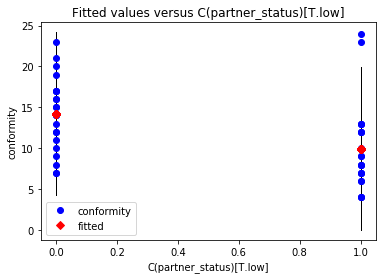

In [55]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(moore_lm, 1, ax=ax)

In [56]:
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame

print(table)

                        sum_sq    df         F    PR(>F)
C(partner_status)   204.332411   1.0  8.743733  0.005029
Residual           1004.867589  43.0       NaN       NaN


### Example 2

Assume gender has no effect on result.  
Do a one-way anova.  
If PR(>F) <= 0.05, reject the assumption.


In [49]:

df = pd.DataFrame(
    {'result': [0,0,0,0,0,1, 1,1,1,1,1,0],
     'gender': ['M','M','M','M','M','M', 'F','F','F','F','F','F'],
     'age': ['<50','<50','<50','>=50','>=50','>=50','<50','<50','<50','>=50','>=50','>=50']}
)

In [50]:
r = 'result ~ C(gender)'
results = ols(r, data=df).fit()
results.params

Intercept         0.833333
C(gender)[T.M]   -0.666667
dtype: float64

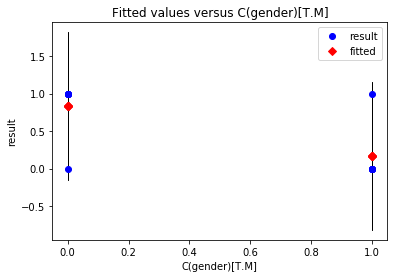

In [51]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(result_lm, 1, ax=ax)

In [52]:
table = sm.stats.anova_lm(results, typ=2) # Type 2 ANOVA DataFrame

print(table)

             sum_sq    df    F  PR(>F)
C(gender)  1.333333   1.0  8.0  0.0179
Residual   1.666667  10.0  NaN     NaN


In [63]:
def esq_sm(aov_table):
    return aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])

esq_sm(table)

0.16898148450809963

# two-way anova

In [67]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/tooth_growth_csv')
data[0:10]

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5
5,10.0,VC,0.5
6,11.2,VC,0.5
7,11.2,VC,0.5
8,5.2,VC,0.5
9,7.0,VC,0.5


In [68]:
formula = 'len ~ C(supp) + C(dose)'
model = ols(formula, data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

               sum_sq    df          F        PR(>F)
C(supp)    205.350000   1.0  14.016638  4.292793e-04
C(dose)   2426.434333   2.0  82.810935  1.871163e-17
Residual   820.425000  56.0        NaN           NaN


In [69]:
model.params

Intercept         12.455
C(supp)[T.VC]     -3.700
C(dose)[T.1.0]     9.130
C(dose)[T.2.0]    15.495
dtype: float64

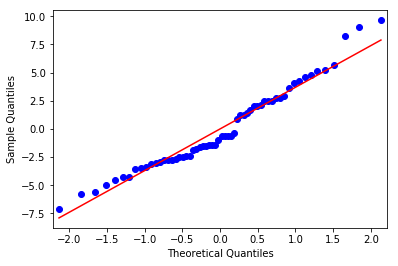

In [70]:
# Q-Q plot

res = model.resid 
fig = sm.qqplot(res, line='s')